In [1]:
import datetime

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader
import sklearn
import sklearn.linear_model
import sklearn.model_selection
import yfinance

yfinance.pdr_override()

In [2]:
df_aapl = pandas_datareader.data.get_data_yahoo('AAPL', start='2023-01-01')
df_meta = pandas_datareader.data.get_data_yahoo('META', start='2023-01-01')
df_gold = pandas_datareader.data.get_data_yahoo('GLD', start='2023-01-01')
df_aapl.tail(3)

/Users/shisotem/.asdf/installs/python/3.11.7/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
/Users/shisotem/.asdf/installs/python/3.11.7/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
/Users/shisotem/.asdf/installs/python/3.11.7/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-02-06,186.860001,189.309998,186.770004,189.300003,189.300003,43490800
2024-02-07,190.639999,191.050003,188.610001,189.410004,189.410004,53439000
2024-02-08,189.389999,189.539993,187.350006,188.320007,188.320007,40928600


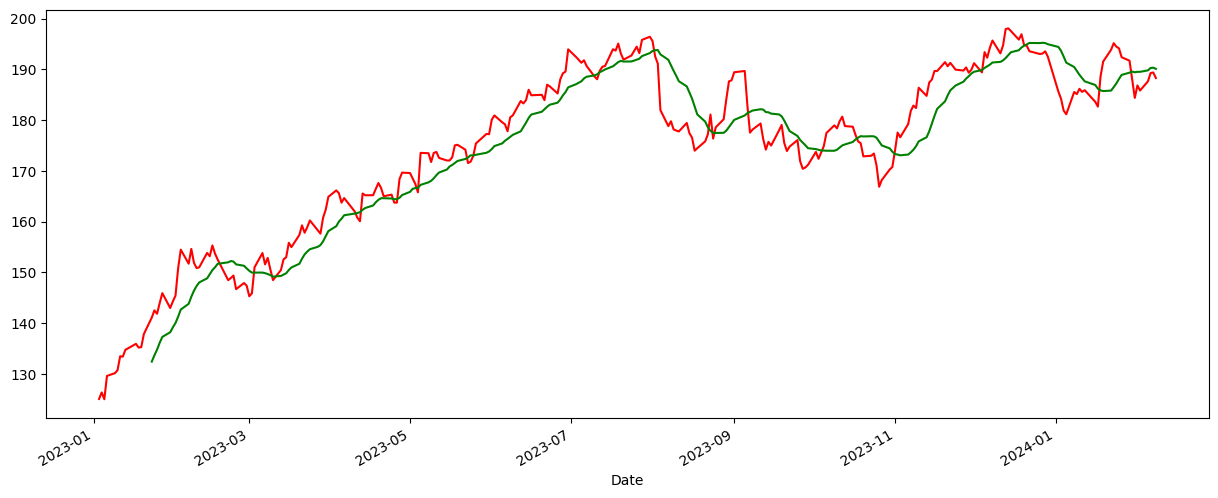

In [3]:
# 単純移動平均(SMA)と株価のグラフ
df_aapl['SMA'] = df_aapl['Close'].rolling(window=14).mean()
df_aapl['Close'].plot(figsize=(15, 6), color='red')
df_aapl['SMA'].plot(figsize=(15, 6), color='green')
plt.show()

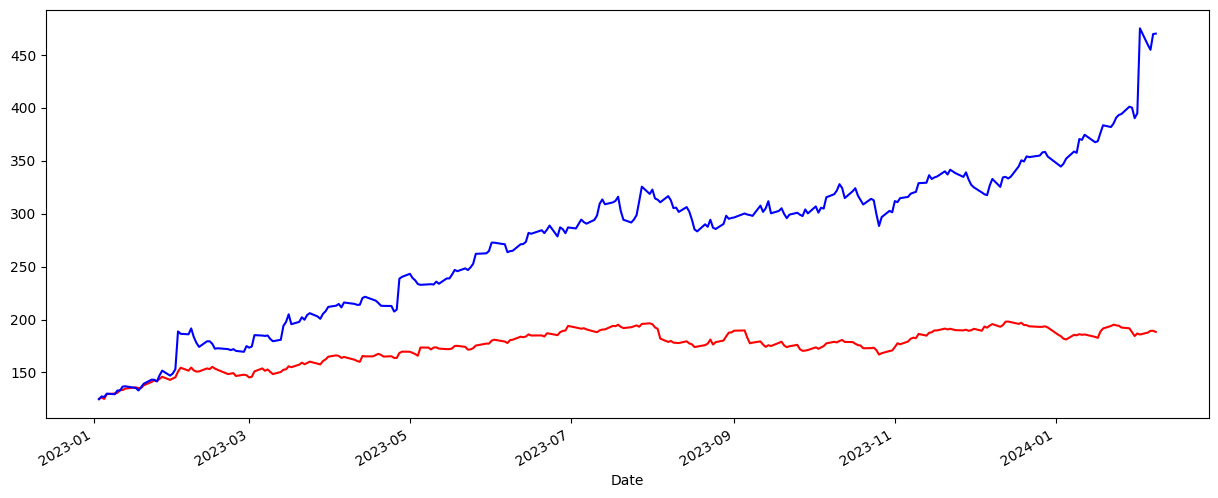

In [4]:
# data mining
df_aapl['Close'].plot(figsize=(15, 6), color='red')
df_meta['Close'].plot(figsize=(15, 6), color='blue')
plt.show()

In [5]:
df_aapl['changing'] = (df_aapl['Close'] - df_aapl['Open']) / df_aapl['Open'] * 100
df_meta['changing'] = (df_meta['Close'] - df_meta['Open']) / df_meta['Open'] * 100
df_gold['changing'] = (df_gold['Close'] - df_gold['Open']) / df_gold['Open'] * 100
df_aapl.tail(3).round(2)

,Open,High,Low,Close,Adj Close,Volume,SMA,changing
Date,,,,,,,,
2024-02-06,186.86,189.31,186.77,189.30,189.30,43490800,190.30,1.31
2024-02-07,190.64,191.05,188.61,189.41,189.41,53439000,190.36,-0.65
2024-02-08,189.39,189.54,187.35,188.32,188.32,40928600,190.12,-0.56


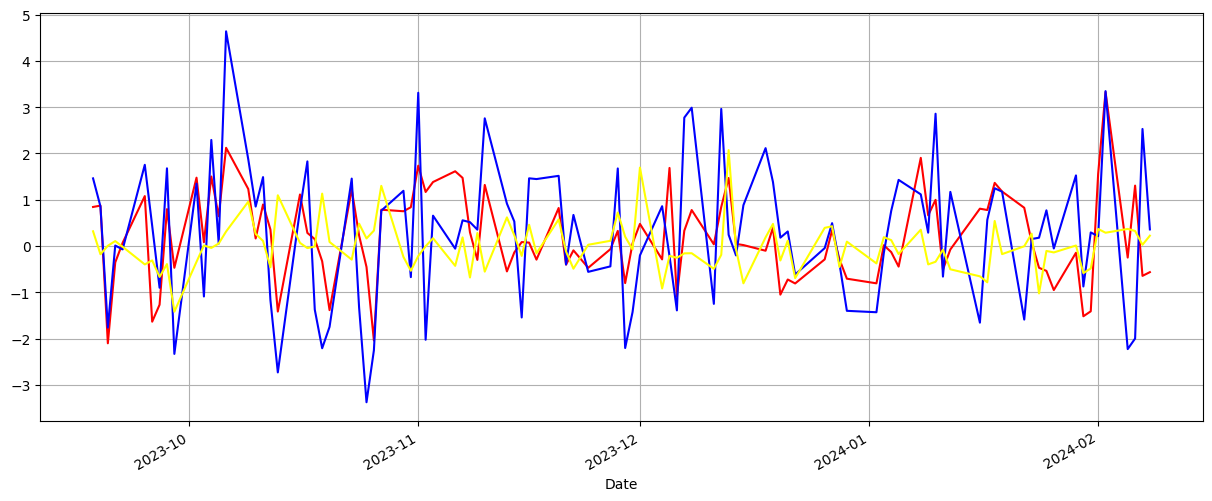

In [6]:
df_aapl['changing'].tail(100).plot(grid=True, figsize=(15, 6), color='red')
df_meta['changing'].tail(100).plot(grid=True, figsize=(15, 6), color='blue')
df_gold['changing'].tail(100).plot(grid=True, figsize=(15, 6), color='yellow')
plt.show()

In [7]:
# mlのためのデータ準備
df_aapl['label'] = df_aapl['Close'].shift(-30)  # 30(営業)日後の終値
df_aapl.tail(35)  # NaNの部分を予測したい！

,Open,High,Low,Close,Adj Close,Volume,SMA,changing,label
Date,,,,,,,,,
2023-12-19,196.160004,196.949997,195.889999,196.940002,196.940002,40714100,194.335716,0.397634,185.850006
2023-12-20,196.899994,197.679993,194.830002,194.830002,194.830002,52242800,194.684288,-1.051291,187.679993
2023-12-21,196.100006,197.080002,193.500000,194.679993,194.679993,46482500,194.930001,-0.724127,189.300003
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.600006,37122800,195.227859,-0.809502,189.410004
2023-12-26,193.610001,193.889999,192.830002,193.050003,193.050003,28919300,195.201431,-0.289240,188.320007
2023-12-27,192.490005,193.500000,191.089996,193.149994,193.149994,48087700,195.260716,0.342869,NaN
2023-12-28,194.139999,194.660004,193.169998,193.580002,193.580002,34049900,195.211430,-0.288450,NaN
2023-12-29,193.899994,194.399994,191.729996,192.529999,192.529999,42628800,194.984287,-0.706547,NaN
2024-01-02,187.149994,188.440002,183.889999,185.639999,185.639999,82488700,194.445716,-0.806837,NaN


In [8]:
X = np.array(df_aapl.drop(['label', 'SMA'], axis='columns'))  # 不要
X = sklearn.preprocessing.scale(X)  # はずれ値対策
X

array([[-2.51552599, -2.61100407, -2.79668781, ..., -2.85209544,
         3.0413112 , -3.83226275],
       [-2.71179903, -2.7426368 , -2.74396095, ..., -2.7778374 ,
         1.72209446, -0.55891802],
       [-2.69790371, -2.79493794, -2.76250217, ..., -2.85497356,
         1.25466051, -1.69412094],
       ...,
       [ 0.7603238 ,  0.82145209,  0.83044232, ...,  0.90615164,
        -0.89426023,  1.01631445],
       [ 0.97917689,  0.92370328,  0.93705423, ...,  0.91251911,
        -0.32375558, -0.7668583 ],
       [ 0.90680481,  0.83496776,  0.86404842, ...,  0.84942381,
        -1.04119606, -0.69353347]])

In [9]:
y = np.array(df_aapl['label'])
y

array([155.33000183, 153.71000671, 152.55000305, 148.47999573,
       148.91000366, 149.3999939 , 146.71000671, 147.91999817,
       147.41000366, 145.30999756, 145.91000366, 151.02999878,
       153.83000183, 151.6000061 , 152.86999512, 150.58999634,
       148.5       , 150.47000122, 152.58999634, 152.99000549,
       155.8500061 , 155.        , 157.3999939 , 159.27999878,
       157.83000183, 158.92999268, 160.25      , 158.27999878,
       157.6499939 , 160.77000427, 162.36000061, 164.8999939 ,
       166.16999817, 165.63000488, 163.75999451, 164.66000366,
       162.02999878, 160.80000305, 160.1000061 , 165.55999756,
       165.21000671, 165.22999573, 166.47000122, 167.63000488,
       166.6499939 , 165.02000427, 165.33000183, 163.77000427,
       163.75999451, 168.41000366, 169.67999268, 169.58999634,
       168.53999329, 167.44999695, 165.78999329, 173.57000732,
       173.5       , 171.77000427, 173.55999756, 173.75      ,
       172.57000732, 172.07000732, 172.07000732, 172.69

In [10]:
y = y[:-30]  # 最近30日分削除
X = X[:-30]  # 最近30日分削除

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, test_size=0.2
)

lr = sklearn.linear_model.LinearRegression()
lr.fit(X_train, y_train)

accuracy = lr.score(X_test, y_test)
accuracy

0.5281764316102274

In [11]:
predicted_data = lr.predict(X[-30:])
predicted_data

array([187.74422274, 189.67291715, 190.89769577, 191.06656431,
       190.31077394, 193.44017816, 190.52046558, 191.70846702,
       190.09294728, 190.95986299, 192.13763749, 188.77983057,
       190.81234284, 192.21117805, 189.43305498, 194.95316926,
       189.4790274 , 194.40757392, 195.30576992, 192.42018864,
       194.20576387, 197.56581593, 194.27659195, 195.779672  ,
       193.3872272 , 195.81864655, 190.7396849 , 190.72401133,
       190.64275567, 192.45431056])

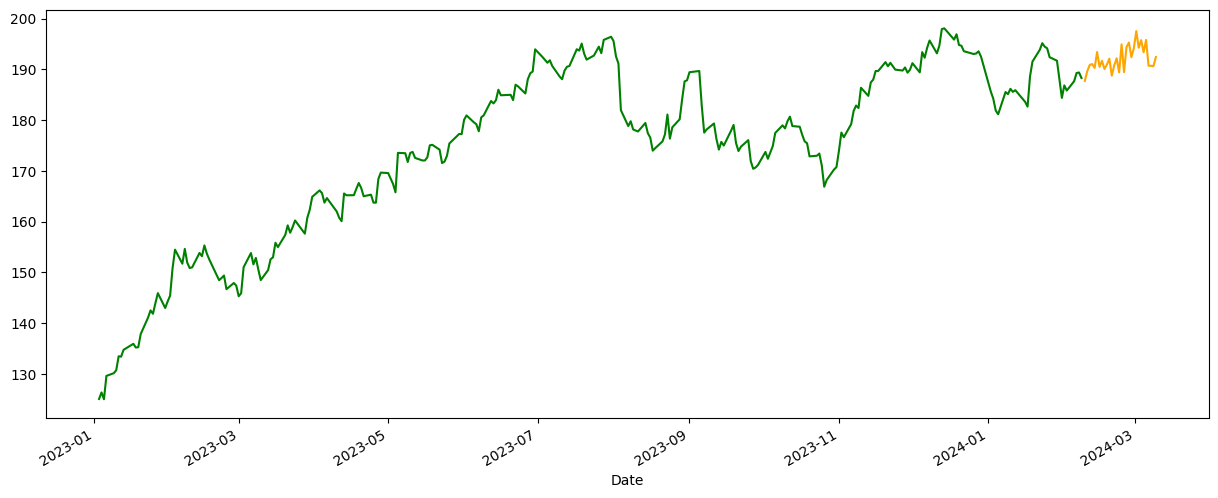

In [12]:
df_aapl['Predict'] = np.nan

last_date = df_aapl.iloc[-1].name
one_day = 86400
next_day = last_date.timestamp() + one_day

for data in predicted_data:
    next_date = datetime.datetime.fromtimestamp(next_day)
    df_aapl.loc[next_date] = np.append([np.nan] * (len(df_aapl.columns) - 1), data)
    next_day += one_day

df_aapl['Close'].plot(figsize=(15, 6), color='green')
df_aapl['Predict'].plot(figsize=(15, 6), color='orange')
plt.show()